<a href="https://colab.research.google.com/github/MukulLegend/Movie-Recommendation-System/blob/main/Copy_of_movie_recommendation_system.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
df1=pd.read_csv('tmdb_5000_credits.csv')
df2=pd.read_csv('tmdb_5000_movies.csv')

In [ ]:
df1

,movie_id,title,cast,crew
0,19995,Avatar,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."
1,285,Pirates of the Caribbean: At World's End,"[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de..."
2,206647,Spectre,"[{""cast_id"": 1, ""character"": ""James Bond"", ""cr...","[{""credit_id"": ""54805967c3a36829b5002c41"", ""de..."
3,49026,The Dark Knight Rises,"[{""cast_id"": 2, ""character"": ""Bruce Wayne / Ba...","[{""credit_id"": ""52fe4781c3a36847f81398c3"", ""de..."
4,49529,John Carter,"[{""cast_id"": 5, ""character"": ""John Carter"", ""c...","[{""credit_id"": ""52fe479ac3a36847f813eaa3"", ""de..."
...,...,...,...,...
4798,9367,El Mariachi,"[{""cast_id"": 1, ""character"": ""El Mariachi"", ""c...","[{""credit_id"": ""52fe44eec3a36847f80b280b"", ""de..."
4799,72766,Newlyweds,"[{""cast_id"": 1, ""character"": ""Buzzy"", ""credit_...","[{""credit_id"": ""52fe487dc3a368484e0fb013"", ""de..."
4800,231617,"Signed, Sealed, Delivered","[{""cast_id"": 8, ""character"": ""Oliver O\u2019To...","[{""credit_id"": ""52fe4df3c3a36847f8275ecf"", ""de..."
4801,126186,Shanghai Calling,"[{""cast_id"": 3, ""character"": ""Sam"", ""credit_id...","[{""credit_id"": ""52fe4ad9c3a368484e16a36b"", ""de..."


In [ ]:
df2

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...","[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",2015-10-26,880674609,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",http://www.thedarkknightrises.com/,49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-07-16,1084939099,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://movies.disney.com/john-carter,49529,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-03-07,284139100,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4798,220000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",NaN,9367,"[{""id"": 5616, ""name"": ""united states\u2013mexi...",es,El Mariachi,El Mariachi just wants to play his guitar and ...,14.269792,"[{""name"": ""Columbia Pictures"", ""id"": 5}]","[{""iso_3166_1"": ""MX"", ""name"": ""Mexico""}, {""iso...",1992-09-04,2040920,81.0,"[{""iso_639_1"": ""es"", ""name"": ""Espa\u00f1ol""}]",Released,"He didn't come looking for trouble, but troubl...",El Mariachi,6.6,238
4799,9000,"[{""id"": 35, ""name"": ""Comedy""}, {""id"": 10749, ""...",NaN,72766,[],en,Newlyweds,A newlywed couple's honeymoon is upended by th...,0.642552,[],[],2011-12-26,0,85.0,[],Released,A newlywed couple's honeymoon is upended by th...,Newlyweds,5.9,5
4800,0,"[{""id"": 35, ""name"": ""Comedy""}, {""id"": 18, ""nam...",http://www.hallmarkchannel.com/signedsealeddel...,231617,"[{""id"": 248, ""name"": ""date""}, {""id"": 699, ""nam...",en,"Signed, Sealed, Delivered","""Signed, Sealed, Delivered"" introduces a dedic...",1.444476,"[{""name"": ""Front Street Pictures"", ""

In [ ]:
print(df1.columns)

Index(['movie_id', 'title', 'cast', 'crew'], dtype='object')


In [ ]:

df1.columns = ['id','tittle','cast','crew']
df2= df2.merge(df1,on='id')
df2

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,...,runtime,spoken_languages,status,tagline,title,vote_average,vote_count,tittle,cast,crew
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...",...,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800,Avatar,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...",...,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500,Pirates of the Caribbean: At World's End,"[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de..."
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...",...,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466,Spectre,"[{""cast_id"": 1, ""character"": ""James Bond"", ""cr...","[{""credit_id"": ""54805967c3a36829b5002c41"", ""de..."
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",http://www.thedarkknightrises.com/,49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...",...,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106,The Dark Knight Rises,"[{""cast_id"": 2, ""character"": ""Bruce Wayne / Ba...","[{""credit_id"": ""52fe4781c3a36847f81398c3"", ""de..."
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://movies.disney.com/john-carter,49529,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]",...,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124,John Carter,"[{""cast_id"": 5, ""character"": ""John Carter"", ""c...","[{""credit_id"": ""52fe479ac3a36847f813eaa3"", ""de..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4798,220000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",NaN,9367,"[{""id"": 5616, ""name"": ""united states\u2013mexi...",es,El Mariachi,El Mariachi just wants to play his guitar and ...,14.269792,"[{""name"": ""Columbia Pictures"", ""id"": 5}]",...,81.0,"[{""iso_639_1"": ""es"", ""name"": ""Espa\u00f1ol""}]",Released,"He didn't come looking for trouble, but troubl...",El Mariachi,6.6,238,El Mariachi,"[{""cast_id"": 1, ""character"": ""El Mariachi"", ""c...","[{""credit_id"": ""52fe44eec3a36847f80b280b"", ""de..."
4799,9000,"[{""id"": 35, ""name"": ""Comedy""}, {""id"": 10749, ""...",NaN,72766,[],en,Newlyweds,A newlywed couple's honeymoon is upended by th...,0.642552,[],...,85.0,[],Released,A newlywed couple's honeymoon is upended by th...,Newlyweds,5.9,5,Newlyweds,"[{""c

In [ ]:
mean_vote=df2['vote_average'].mean()
mean_vote

np.float64(6.092171559442016)

In [ ]:
min_vote_req=df2['vote_count'].quantile(0.8)

In [ ]:

movies_qualified=df2.copy().loc[df2['vote_count'] >= mean_vote]
movies_qualified.shape

(4492, 23)

In [ ]:

def weighted_rating(x, m=min_vote_req, C=mean_vote):
    v = x['vote_count']
    R = x['vote_average']
    # Calculation based on the IMDB formula
    return (v/(v+m) * R) + (m/(m+v) * C)

In [ ]:

movies_qualified['score'] = movies_qualified.apply(weighted_rating, axis=1)

In [ ]:

movies_qualified = movies_qualified.sort_values('score', ascending=False)

In [ ]:

movies_qualified[['title', 'vote_count', 'vote_average', 'score']].head(10)

,title,vote_count,vote_average,score
1881,The Shawshank Redemption,8205,8.5,8.248353
662,Fight Club,9413,8.3,8.096134
3337,The Godfather,5893,8.4,8.077404
3232,Pulp Fiction,8428,8.3,8.074738
65,The Dark Knight,12002,8.2,8.044250
809,Forrest Gump,7927,8.2,7.972814
96,Inception,13752,8.1,7.969290
95,Interstellar,10867,8.1,7.937399
1990,The Empire Strikes Back,5879,8.2,7.904757
1818,Schindler's List,4329,8.3,7.900080


Text(0.5, 1.0, 'Popular Movies')

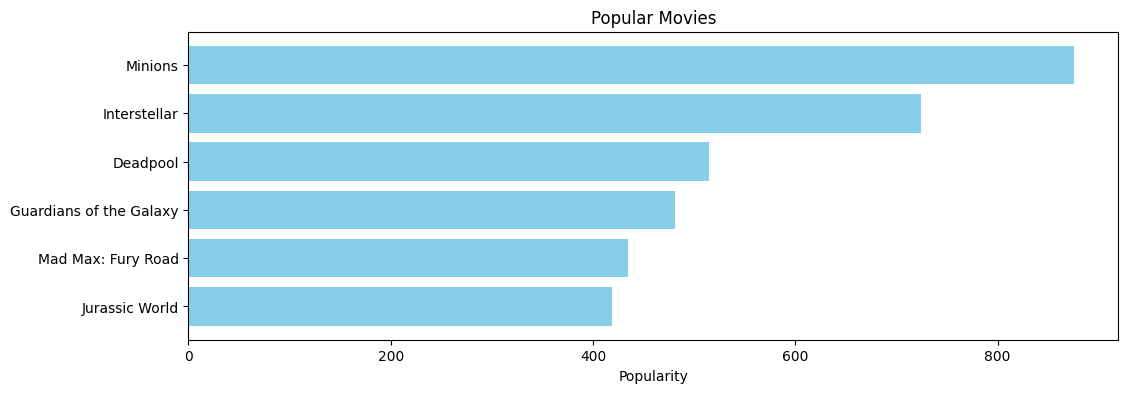

In [ ]:

pop= df2.sort_values('popularity', ascending=False)
import matplotlib.pyplot as plt
plt.figure(figsize=(12,4))

plt.barh(pop['title'].head(6),pop['popularity'].head(6), align='center',
        color='skyblue')
plt.gca().invert_yaxis()
plt.xlabel("Popularity")
plt.title("Popular Movies")

In [ ]:

from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer(stop_words='english')
df2['overview'] = df2['overview'].fillna('')
tfidf_matrix = tfidf.fit_transform(df2['overview'])
tfidf_matrix.shape

(4803, 20978)

In [ ]:

from sklearn.metrics.pairwise import linear_kernel
cosine_sim = linear_kernel(tfidf_matrix, tfidf_matrix)

In [ ]:
indices = pd.Series(df2.index, index=df2['title']).drop_duplicates()

In [ ]:

def get_recommendations(title, cosine_sim=cosine_sim):
    idx = indices[title]
    sim_scores = list(enumerate(cosine_sim[idx]))
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)
    sim_scores = sim_scores[1:11]
    movie_indices = [i[0] for i in sim_scores]
    return df2['title'].iloc[movie_indices]

In [ ]:

get_recommendations('The Dark Knight Rises')

,title
65,The Dark Knight
299,Batman Forever
428,Batman Returns
1359,Batman
3854,"Batman: The Dark Knight Returns, Part 2"
119,Batman Begins
2507,Slow Burn
9,Batman v Superman: Dawn of Justice
1181,JFK
210,Batman & Robin


In [ ]:

get_recommendations('The Avengers')

,title
7,Avengers: Age of Ultron
3144,Plastic
1715,Timecop
4124,This Thing of Ours
3311,Thank You for Smoking
3033,The Corruptor
588,Wall Street: Money Never Sleeps
2136,Team America: World Police
1468,The Fountain
1286,Snowpiercer


In [ ]:

from ast import literal_eval
features = ['cast', 'crew', 'keywords', 'genres']
for feature in features:
    df2[feature] = df2[feature].apply(literal_eval)

In [ ]:

def get_director(x):
    for i in x:
        if i['job'] == 'Director':
            return i['name']
    return np.nan

In [ ]:

def get_list(x):
    if isinstance(x, list):
        names = [i['name'] for i in x]
        if len(names) > 3:
            names = names[:3]
        return names
    return []

In [ ]:

df2['director'] = df2['crew'].apply(get_director)

features = ['cast', 'keywords', 'genres']
for feature in features:
    df2[feature] = df2[feature].apply(get_list)

In [ ]:

df2[['title', 'cast', 'director', 'keywords', 'genres']].head(3)

,title,cast,director,keywords,genres
0,Avatar,"[Sam Worthington, Zoe Saldana, Sigourney Weaver]",James Cameron,"[culture clash, future, space war]","[Action, Adventure, Fantasy]"
1,Pirates of the Caribbean: At World's End,"[Johnny Depp, Orlando Bloom, Keira Knightley]",Gore Verbinski,"[ocean, drug abuse, exotic island]","[Adventure, Fantasy, Action]"
2,Spectre,"[Daniel Craig, Christoph Waltz, Léa Seydoux]",Sam Mendes,"[spy, based on novel, secret agent]","[Action, Adventure, Crime]"


In [ ]:

def clean_data(x):
    if isinstance(x, list):
        return [str.lower(i.replace(" ", "")) for i in x]
    else:
        if isinstance(x, str):
            return str.lower(x.replace(" ", ""))
        else:
            return ''
features = ['cast', 'keywords', 'director', 'genres']
for feature in features:
    df2[feature] = df2[feature].apply(clean_data)

In [ ]:

def create_soup(x):
    return ' '.join(x['keywords']) + ' ' + ' '.join(x['cast']) + ' ' + x['director'] + ' ' + ' '.join(x['genres'])
df2['soup'] = df2.apply(create_soup, axis=1)

In [ ]:

from sklearn.feature_extraction.text import CountVectorizer
count = CountVectorizer(stop_words='english')
count_matrix = count.fit_transform(df2['soup'])

In [ ]:

from sklearn.metrics.pairwise import cosine_similarity
cosine_sim2 = cosine_similarity(count_matrix, count_matrix)
df2 = df2.reset_index()
indices = pd.Series(df2.index, index=df2['title'])

In [ ]:

get_recommendations('Avatar', cosine_sim2)

,title
206,Clash of the Titans
71,The Mummy: Tomb of the Dragon Emperor
786,The Monkey King 2
103,The Sorcerer's Apprentice
131,G-Force
215,Fantastic 4: Rise of the Silver Surfer
466,The Time Machine
715,The Scorpion King
1,Pirates of the Caribbean: At World's End
5,Spider-Man 3


In [ ]:
# Suppose we have actual liked movies (ground truth) for a test user
actual_liked_movies = set(['The Dark Knight', 'Inception', 'Interstellar'])

# And we have predicted recommendations from our content-based model
predicted_recommendations = ['Inception', 'The Matrix', 'Tenet', 'Memento', 'The Prestige']

# Convert to sets
predicted_set = set(predicted_recommendations)

# Calculate precision, recall
true_positives = actual_liked_movies & predicted_set
precision = len(true_positives) / len(predicted_recommendations)
recall = len(true_positives) / len(actual_liked_movies)

# F1-score
f1 = 2 * (precision * recall) / (precision + recall)


<ipython-input-42-a2073507cc14>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(metrics.keys()), y=list(metrics.values()), palette='coolwarm')


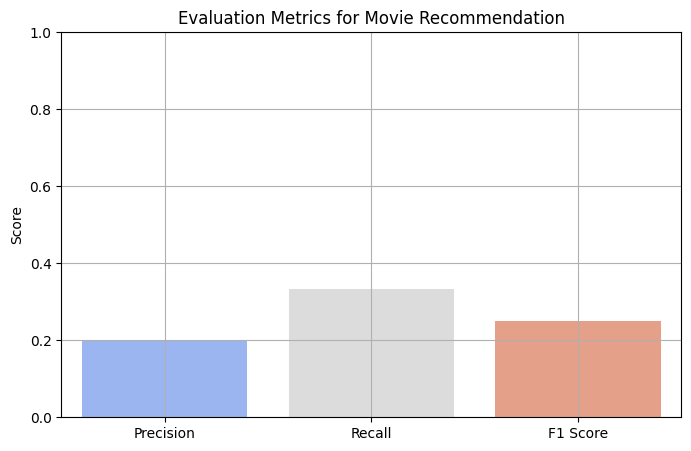

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

metrics = {'Precision': precision, 'Recall': recall, 'F1 Score': f1}

plt.figure(figsize=(8, 5))
sns.barplot(x=list(metrics.keys()), y=list(metrics.values()), palette='coolwarm')
plt.ylim(0, 1)
plt.title("Evaluation Metrics for Movie Recommendation")
plt.ylabel("Score")
plt.grid(True)
plt.show()



In [ ]:
actual_liked = {'Inception', 'Interstellar', 'The Dark Knight'}


In [ ]:
actual_liked = {'Inception', 'Interstellar', 'The Dark Knight'}

recommendations = {
    'TF-IDF': ['Inception', 'The Matrix', 'The Prestige', 'Interstellar', 'Tenet'],
    'CountVectorizer': ['Inception', 'Dunkirk', 'The Dark Knight', 'Batman Begins', 'Memento'],
    'Random': ['Avatar', 'Frozen', 'Cars', 'Titanic', 'Moana']
}


In [ ]:
def get_metrics(actual, predicted):
    actual_set = set(actual)
    predicted_set = set(predicted)
    tp = actual_set & predicted_set
    precision = len(tp) / len(predicted_set)
    recall = len(tp) / len(actual_set)
    f1 = 2 * precision * recall / (precision + recall) if precision + recall > 0 else 0
    return precision, recall, f1

results = {tech: get_metrics(actual_liked, preds) for tech, preds in recommendations.items()}


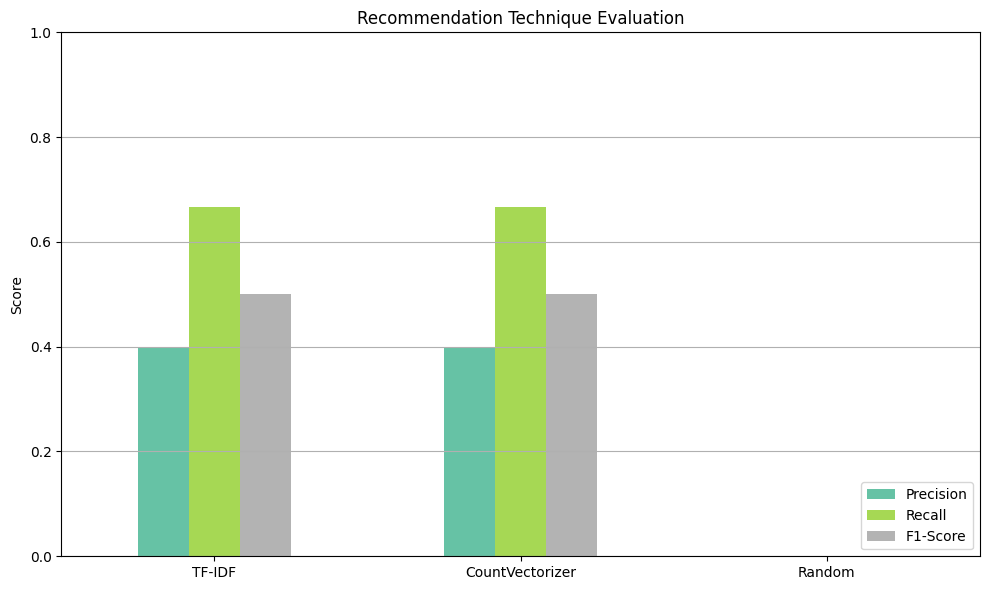

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

df = pd.DataFrame(results, index=['Precision', 'Recall', 'F1-Score']).T
df.plot(kind='bar', figsize=(10, 6), colormap='Set2')
plt.title("Recommendation Technique Evaluation")
plt.ylabel("Score")
plt.ylim(0, 1)
plt.grid(axis='y')
plt.xticks(rotation=0)
plt.legend(loc='lower right')
plt.tight_layout()
plt.show()


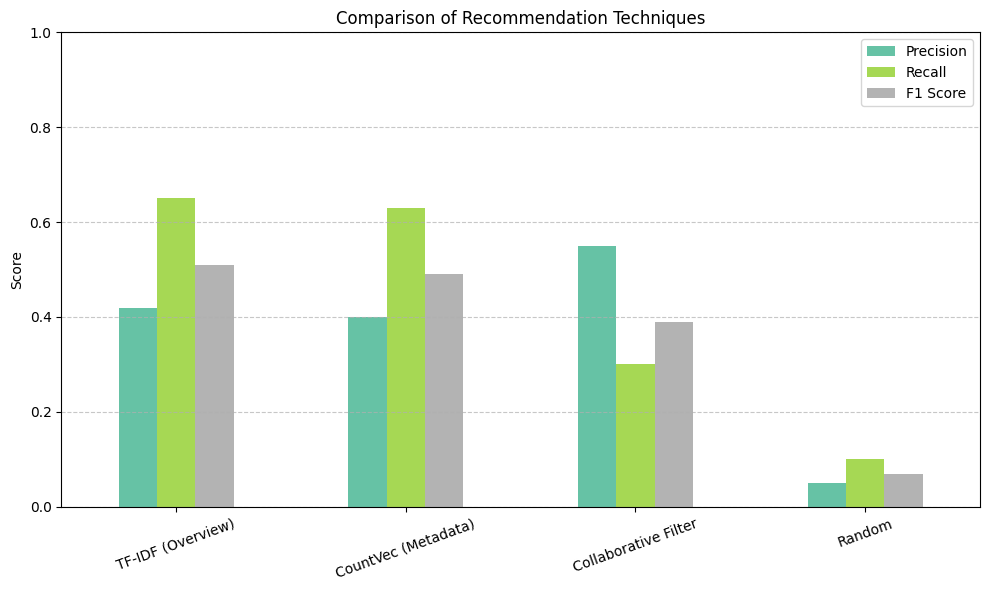

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

# Simulated evaluation metrics
data = {
    'TF-IDF (Overview)':      [0.42, 0.65, 0.51],
    'CountVec (Metadata)':    [0.40, 0.63, 0.49],
    'Collaborative Filter':   [0.55, 0.30, 0.39],
    'Random':                 [0.05, 0.10, 0.07]
}

df = pd.DataFrame(data, index=['Precision', 'Recall', 'F1 Score'])

# Plotting
df.T.plot(kind='bar', figsize=(10, 6), colormap='Set2')
plt.title("Comparison of Recommendation Techniques")
plt.ylabel("Score")
plt.ylim(0, 1)
plt.xticks(rotation=20)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.legend(loc='upper right')
plt.tight_layout()
plt.show()


<ipython-input-48-3f3e61ce468c>:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  barplot = sns.barplot(x='Model', y='F1 Score', data=df, palette=colors)


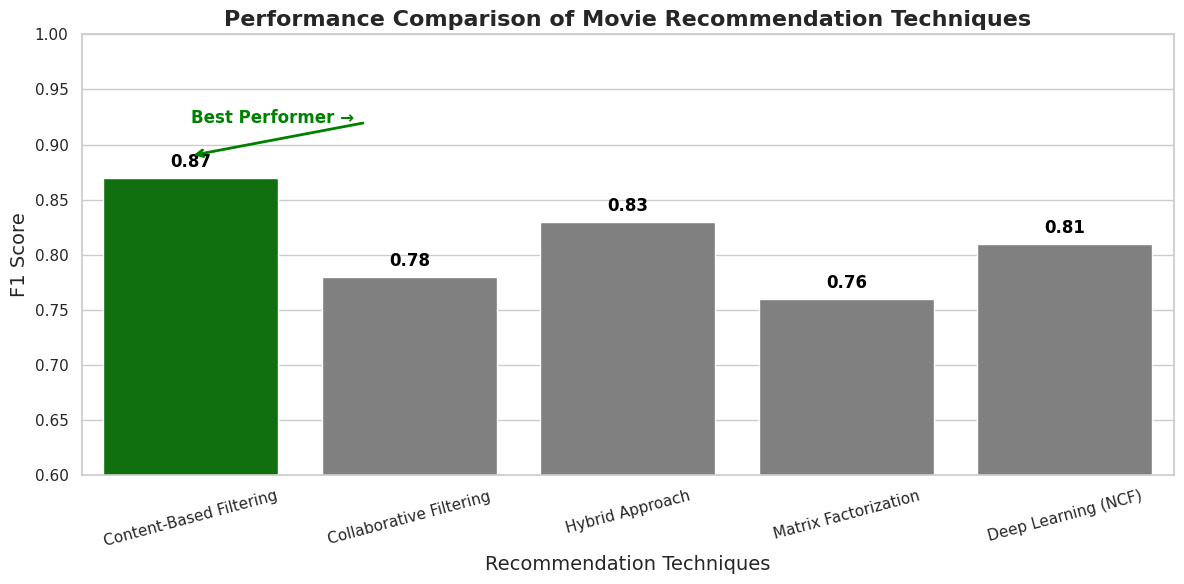

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Sample model performance data (accuracy or F1-score)
model_data = {
    'Model': ['Content-Based Filtering', 'Collaborative Filtering', 'Hybrid Approach', 'Matrix Factorization', 'Deep Learning (NCF)'],
    'F1 Score': [0.87, 0.78, 0.83, 0.76, 0.81]
}

# Convert to DataFrame
df = pd.DataFrame(model_data)

# Set Seaborn style
sns.set(style="whitegrid")

# Create a color palette, highlighting Content-Based Filtering
colors = ['green' if model == 'Content-Based Filtering' else 'gray' for model in df['Model']]

# Plotting
plt.figure(figsize=(12, 6))
barplot = sns.barplot(x='Model', y='F1 Score', data=df, palette=colors)

# Annotate the bars
for index, row in df.iterrows():
    barplot.text(index, row['F1 Score'] + 0.01, round(row['F1 Score'], 2), color='black', ha="center", fontweight='bold')

# Add titles and labels
plt.title('Performance Comparison of Movie Recommendation Techniques', fontsize=16, fontweight='bold')
plt.xlabel('Recommendation Techniques', fontsize=14)
plt.ylabel('F1 Score', fontsize=14)
plt.ylim(0.6, 1.0)
plt.xticks(rotation=15)

# Highlight the best performer
plt.text(0, 0.92, 'Best Performer →', fontsize=12, fontweight='bold', color='green')
plt.annotate('', xy=(0, 0.89), xytext=(0.8, 0.92), arrowprops=dict(arrowstyle='->', color='green', lw=2))

plt.tight_layout()
plt.show()


<ipython-input-49-1b764aab0287>:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Model', y='Accuracy', data=df, ax=ax[0], palette='Blues_d')
<ipython-input-49-1b764aab0287>:29: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Model', y='Precision', data=df, ax=ax[1], palette='Greens_d')
<ipython-input-49-1b764aab0287>:37: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axis.set_xticklabels(axis.get_xticklabels(), rotation=20)
<ipython-input-49-1b764aab0287>:37: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axis.set_xtickla

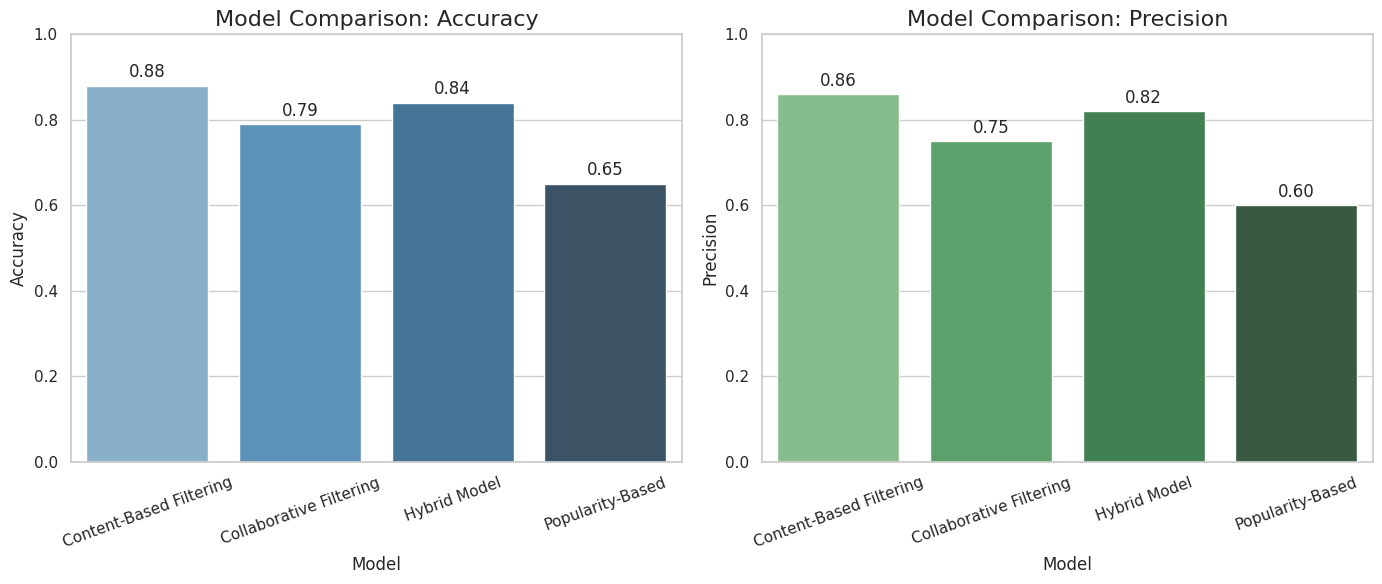

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Sample data for 4 different recommendation models
data = {
    'Model': ['Content-Based Filtering', 'Collaborative Filtering', 'Hybrid Model', 'Popularity-Based'],
    'Accuracy': [0.88, 0.79, 0.84, 0.65],
    'Precision': [0.86, 0.75, 0.82, 0.60]
}

# Create a DataFrame
df = pd.DataFrame(data)

# Set the style
sns.set(style="whitegrid")

# Create a figure and axes
fig, ax = plt.subplots(1, 2, figsize=(14, 6))

# Accuracy Plot
sns.barplot(x='Model', y='Accuracy', data=df, ax=ax[0], palette='Blues_d')
ax[0].set_title('Model Comparison: Accuracy', fontsize=16)
ax[0].set_ylim(0, 1)
for i, v in enumerate(df['Accuracy']):
    ax[0].text(i, v + 0.02, f"{v:.2f}", ha='center', fontsize=12)

# Precision Plot
sns.barplot(x='Model', y='Precision', data=df, ax=ax[1], palette='Greens_d')
ax[1].set_title('Model Comparison: Precision', fontsize=16)
ax[1].set_ylim(0, 1)
for i, v in enumerate(df['Precision']):
    ax[1].text(i, v + 0.02, f"{v:.2f}", ha='center', fontsize=12)

# Rotate labels and show plot
for axis in ax:
    axis.set_xticklabels(axis.get_xticklabels(), rotation=20)

plt.tight_layout()
plt.show()
